In [1]:
%load_ext autoreload
%autoreload 2

In [21]:
import sys, os
import numpy as np
import torch
from torch import Tensor
from torch.utils.data import Dataset
from torchvision import transforms
import nibabel as nib
import nrrd
import random
from omegaconf import OmegaConf
from typing import Iterable, Dict, Callable, Tuple, Union
from scipy.ndimage import binary_erosion, binary_dilation
import random
import matplotlib.pyplot as plt

sys.path.append('..')
from dataset import AEDataset, EvalDataset, PretrainingDataset
# from utils import *
# from model import get_model
# from user_model import UserModel

In [22]:
# Load config
cfg = OmegaConf.load('../configs/eval.yaml')

In [39]:
# Load dataset
dataset = EvalDataset(
    subject_id=784565,
    cfg=cfg, 
    modality='reconstruction',
    to_gpu=False
)

In [73]:
data_in = dataset.data_in.clone()
brain_mask = dataset.brain_mask.clone()
label = dataset.label.clone()

In [74]:
data_in = data_in.permute(1,3,2,0).rot90(1, dims=[2,3])[14:159]
brain_mask = brain_mask.permute(1,2,0).rot90(1, dims=[1,2])[14:159]
label = label.permute(0,2,3,1).rot90(1, dims=[2,3])[:,14:159]

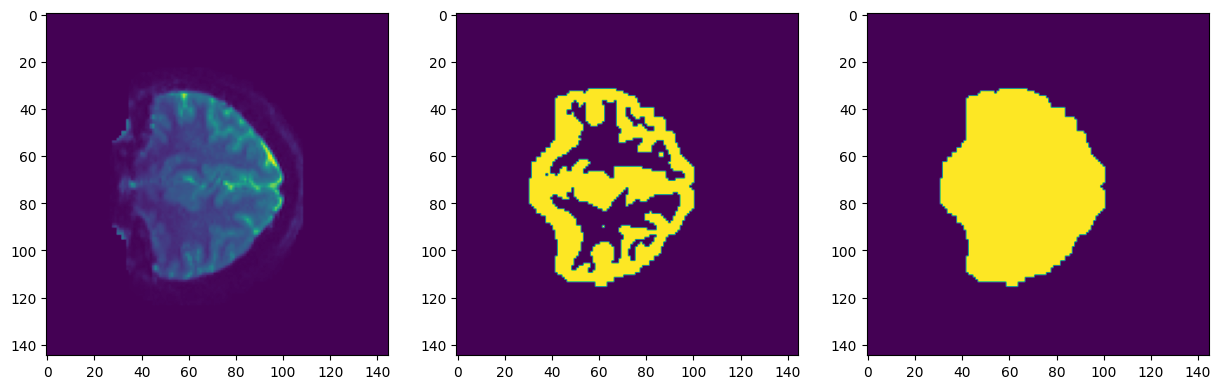

In [79]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(data_in[120,0])
axes[1].imshow(label[0, 120])
axes[2].imshow(brain_mask[120])


In [68]:
data_in.shape

torch.Size([145, 288, 145, 145])

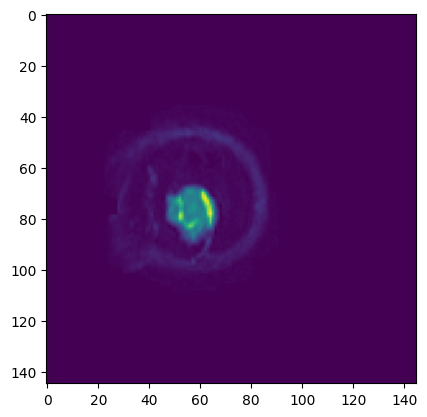

In [77]:
train_data = PretrainingDataset(
    subjects = [784565],
    data_dir = cfg.data.data_dir
)
tmp = train_data[20]
plt.imshow(tmp['input'][0])